In [1]:
import matplotlib.pyplot as plt

In [2]:
with open('result_file.txt') as f:
    res_sat = eval(f.read())

In [3]:
import pandas

In [4]:
df_sat = pandas.DataFrame(res_sat)
df_sat

,chuffed_int,coin-bc_int,cplex_float,cplex_int,gecode_int,gist_int,gurobi_float,gurobi_int,highs_int,sat_int,scip_float,scip_int
nb,80.000,80.000,3.000,80.000,80.000,80.000,65.000,80.000,NaN,80.000,80.000,80.000
time,203.386,91.901,1.153,28.059,208.842,215.051,23.196,33.533,NaN,27.441,45.079,52.451


In [5]:
df_sat_mi = df_sat.copy()
df_sat_mi.columns = pandas.MultiIndex.from_tuples([tuple(x.split('_')) for x in df_sat.columns])
df_sat_mi = df_sat_mi.sort_index(axis=1,level=[0,1],ascending=[True,False])
df_sat_mi

chuffed coin-bc   cplex          gecode     gist  gurobi         highs  \
          int     int     int  float      int      int     int   float   int   
nb     80.000  80.000  80.000  3.000   80.000   80.000  80.000  65.000   NaN   
time  203.386  91.901  28.059  1.153  208.842  215.051  33.533  23.196   NaN   

         sat    scip          
         int     int   float  
nb    80.000  80.000  80.000  
time  27.441  52.451  45.079

In [12]:
df_sat_mi[('gurobi', 'float')].loc['time'] = 0

<AxesSubplot:>

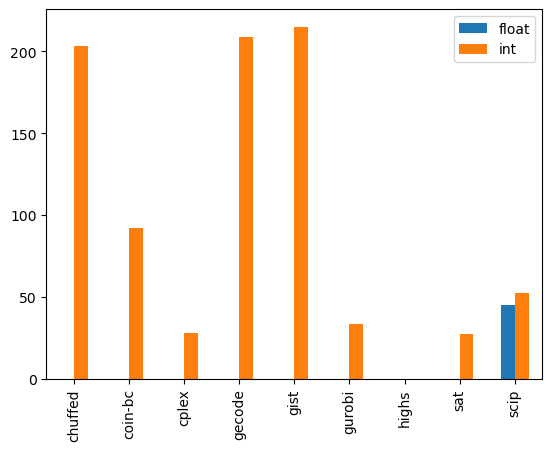

In [13]:
dfplot = df_sat_mi.loc['time'].unstack().plot(kind='bar')
dfplot

In [85]:
df_sat_nu = df_sat.copy()
df_min_nu = df_min.copy()
df_min_nu.columns = pandas.MultiIndex.from_tuples(list(map(lambda x: (x[0], x[1] + '_min'), (x.split('_') for x in df_min.columns))))
df_sat_nu.columns = pandas.MultiIndex.from_tuples(list(map(lambda x: (x[0], x[1] + '_sat'), (x.split('_') for x in df_sat.columns))))
df_join_mi = df_sat_nu.join(df_min_nu)
df_join_mi = df_join_mi.sort_index(axis=1,level=[0,1],ascending=[True,False])
df_join_mi

chuffed         coin-bc           cplex                              \
     int_sat int_min int_sat int_min int_sat int_min float_sat float_min   
nb     4.000   4.000   5.000   4.000   5.000   4.000    47.000     6.000   
time   1.254   1.018   1.894   1.255   1.897   1.285    18.362     2.088   

      gecode          ...   highs             sat            scip          \
     int_sat int_min  ... int_sat int_min int_sat int_min int_sat int_min   
nb     4.000   4.000  ...   4.000     NaN     0.0   4.000   7.000   4.000   
time   1.385   1.061  ...   1.699     NaN     NaN   1.124   3.208   1.712   

                          xpress          
     float_sat float_min int_sat int_min  
nb       5.000     6.000     NaN     NaN  
time     2.631     2.458     NaN     NaN  

[2 rows x 26 columns]

<AxesSubplot:>

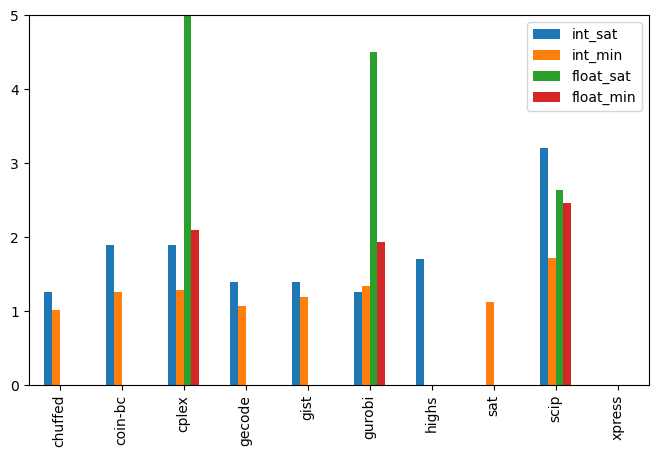

In [99]:
dfplot = df_join_mi.loc['time'].unstack()[["int_sat", "int_min", "float_sat", "float_min"]].plot(kind='bar', figsize=(8,4.8))
plt.ylim(top=5)
dfplot

In [87]:
df_join_mi[["int_sat", "int_min", "float_min", "float_sat"]]

KeyError: "['int_sat' 'int_min' 'float_min' 'float_sat'] not in index"